# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>    
</ul>

<a id='intro'></a>
## Introduction

The topic of this project's dataset is *Movies*. The dataset contains data about over 10,800 movies that were released starting 1960 and ending 2015. The covered data includes movie information about original title, cast, director, production house, genre(s), release date. Other votes and popularity information are also available. Finally, budget and revenue data are available both before and after adjusting for inflation.

The main questions which the following data analysis process aims to answer are:

##### Research Question 1 Which genres are most popular from year to year?

##### Research Question 2 What kinds of properties are associated with movies that have high revenues?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In the above section, libraries which are expected to be utilized throughout the project are imported.

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Because of the width of data, it looks like some columns were skipped. So let us view the head part again but only for the columns starting from tagline and afterwards.

In [3]:
df.loc[:, 'tagline':].head()

,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


After loading the data and viewing all the fields, a couple of thing to be noticed. For instance, some columns such as cast, genres and production companies consists of multiple values separated by "|". Also, it looks like there are several columns that should be dropped as they will not be of much use for the analysis. 

In [4]:
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'director', 'release_date', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


A couple of columns were dropped to make sure there is no unnecessary clutter. Unadjusted budget and revenue columns were dropped because we are dealing with movie data from across over 50 years and it would make more sense to utilize the columns adjusted for inflation. From here on, any mentions of revenue or budget will be in reference to the adjusted columns.

In [5]:
df.duplicated().sum()

1

Checking for duplicates to be removed in the following cleaning phase.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   runtime         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   vote_count      10866 non-null  int64  
 5   vote_average    10866 non-null  float64
 6   release_year    10866 non-null  int64  
 7   budget_adj      10866 non-null  float64
 8   revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 764.1+ KB


A couple of things to notice from the above info. Most data types seem fine except for release_year which, ideally, should be in datetime format. However, for the needed analysis, this particular column will not cause any issues considering it is only in years and no month/day/time data included. Another thing, it seems like the genres column has 23 null values which should be addressed while tackling the first question.

In [7]:
df['genres'].isnull().sum()

23

In [8]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The below float formatting code is used to avoid scientific notations showing up in the describe() section below. The reference for this code is https://stackoverflow.com/questions/42735541/customized-float-formatting-in-a-pandas-dataframe/47614756.

In [9]:
pd.options.display.float_format = '{:,.4f}'.format
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.0000","10,866.0000","10,866.0000","10,866.0000","10,866.0000","10,866.0000","10,866.0000"
mean,0.6464,102.0709,217.3897,5.9749,"2,001.3227","17,551,039.8229","51,364,363.2533"
std,1.0002,31.3814,575.6191,0.9351,12.8129,"34,306,155.7228","144,632,485.0400"
min,0.0001,0.0000,10.0000,1.5000,"1,960.0000",0.0000,0.0000
25%,0.2076,90.0000,17.0000,5.4000,"1,995.0000",0.0000,0.0000
50%,0.3839,99.0000,38.0000,6.0000,"2,006.0000",0.0000,0.0000
75%,0.7138,111.0000,145.7500,6.6000,"2,011.0000","20,853,251.0844","33,697,095.7173"
max,32.9858,900.0000,"9,767.0000",9.2000,"2,015.0000","425,000,000.0000","2,827,123,750.4119"


The above summary statistics are showing zero minimum values for runtime, budget, and revenue. This should be investigated further as they could be indicating null values.

In [10]:
df[(df[['runtime', 'budget_adj', 'revenue_adj']] == 0).any(axis=1)].shape

(7011, 9)

7011 rows have zeros in at least 1 of the 3 mentioned columns. This is a huge part of the dataset which could not simply be dropped. This part should be revisited as it will have a considerable effect when tackling the second questions.

Moreover, in order to further assess and understand the distribution of variables, the following histograms should do the trick.

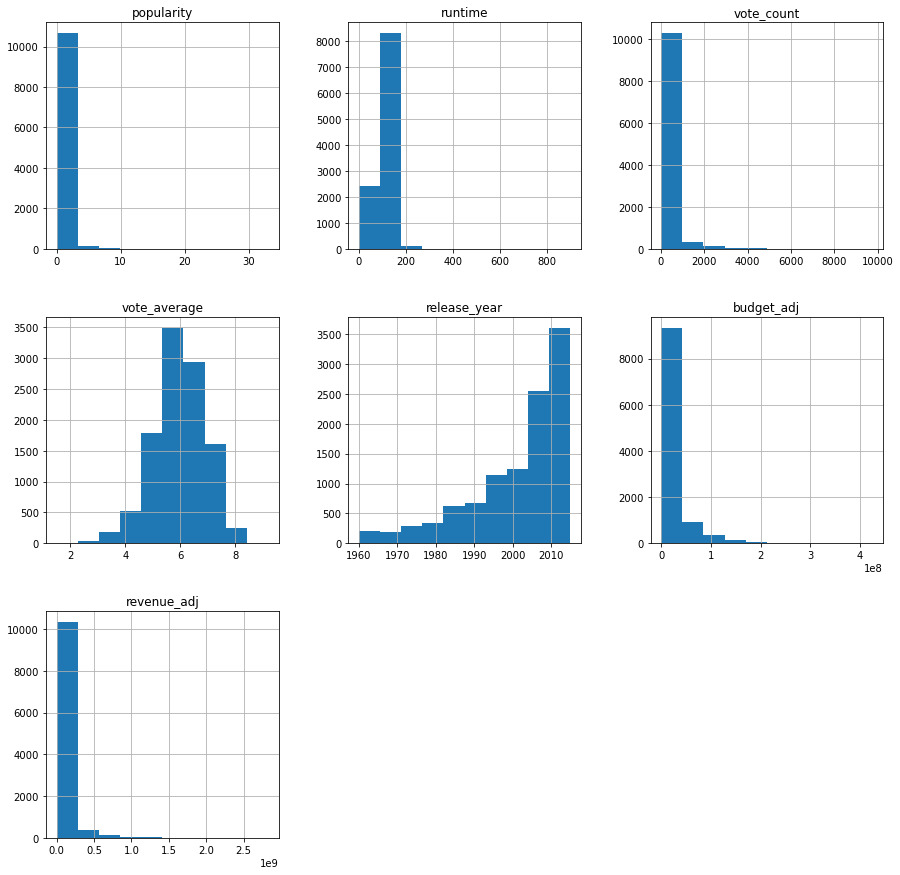

In [11]:
df.hist(figsize=(15, 15));

An important thing to notice is that several variables are aggressively skewed to the right. This is true for popularity, runtime, vote count, budget, and revenue. This is more clear in the below box plots.

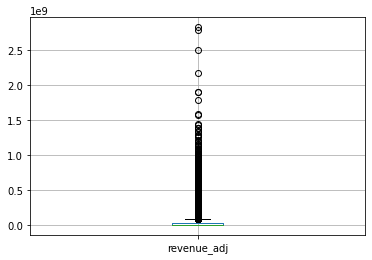

In [12]:
df.boxplot('revenue_adj');

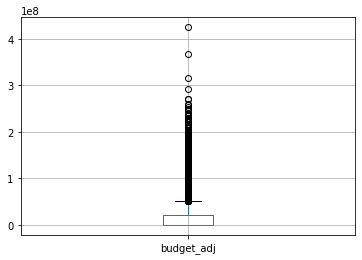

In [13]:
df.boxplot('budget_adj');

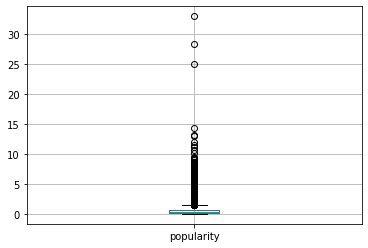

In [14]:
df.boxplot('popularity');

### Data Cleaning

First thing to do is remove the duplicate row.

In [15]:
df.shape

(10866, 9)

In [16]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 9)

Because each question seem to be concerned with a relatively different subset of the data, it was decided to make 2 copies so that cleaning decisions could be better tailored for each question.

For the first question, a copy will be created to just focus on release year, genres, and popularity.

In [17]:
df_pop = df[['genres', 'release_year', 'popularity']].copy()
df_pop.shape

(10865, 3)

Then, let's remove the 23 null values found in the genres columns.

In [18]:
df_pop.dropna(inplace=True)
df_pop.shape

(10842, 3)

In [19]:
df_pop.head()

,genres,release_year,popularity
0,Action|Adventure|Science Fiction|Thriller,2015,32.9858
1,Action|Adventure|Science Fiction|Thriller,2015,28.4199
2,Adventure|Science Fiction|Thriller,2015,13.1125
3,Action|Adventure|Science Fiction|Fantasy,2015,11.1731
4,Action|Crime|Thriller,2015,9.3350


As mentioned before, the genres column contain multiple values separated by a "|". After research, the following referenced approach was used to separate each value into a different row with the same year and popularity rating assigned to it. https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

In [20]:
df_pop = df_pop.assign(genres=df['genres'].str.split('|')).explode('genres')
df_pop.head(10)

,genres,release_year,popularity
0,Action,2015,32.9858
0,Adventure,2015,32.9858
0,Science Fiction,2015,32.9858
0,Thriller,2015,32.9858
1,Action,2015,28.4199
1,Adventure,2015,28.4199
1,Science Fiction,2015,28.4199
1,Thriller,2015,28.4199
2,Adventure,2015,13.1125
2,Science Fiction,2015,13.1125


In [21]:
df_pop['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

The above is a list of all unique values for transformed genres column. Right now, we have a clean dataframe to further explore in the next part of the analysis.

For the second question, the below dataframe copy is created to focus on quantitative variables which could possibly have a correlation with the adjusted revenues.

In [22]:
df_rev = df[['original_title', 'release_year', 'runtime', 'vote_average', 'popularity', 'budget_adj', 'revenue_adj']].copy()
df_rev.shape

(10865, 7)

In [23]:
df[(df[['runtime', 'budget_adj', 'revenue_adj']] == 0).any(axis=1)].shape

(7011, 9)

As mentioned before, a considerable part of the dataset has zero minimum values for the runtime, revenue, and budget fields. Let us have a deeper look at each of them separately.

In [24]:
df_rev[df_rev['runtime'] == 0].shape

(31, 7)

So for runtime zeros, it is only 31 rows, let us have a depper looks on what those movies are.

In [25]:
df_rev[df_rev['runtime'] == 0]

,original_title,release_year,runtime,vote_average,popularity,budget_adj,revenue_adj
92,Mythica: The Necromancer,2015,0,5.4000,1.8760,0.0000,0.0000
334,Ronaldo,2015,0,6.5000,0.3577,0.0000,0.0000
410,Anarchy Parlor,2015,0,5.6000,0.0975,0.0000,0.0000
445,The Exorcism of Molly Hartley,2015,0,5.0000,0.2185,0.0000,0.0000
486,If There Be Thorns,2015,0,5.4000,0.1767,0.0000,0.0000
595,Deep Dark,2015,0,4.6000,0.0287,0.0000,0.0000
616,The Outfield,2015,0,6.6000,0.0268,0.0000,0.0000
1241,Dance-Off,2014,0,5.7000,0.1354,0.0000,0.0000
1289,Treehouse,2014,0,3.4000,0.0375,"2,993,545.9150",0.0000
1293,Tim Maia,2014,0,6.0000,0.0369,0.0000,0.0000


31 movies have zero minimum runtime which does not make sense because this dataset is covereing released movies which must all have a running time > 0. Additionally, a random sample of the 31 movie titles has been research to ensure those movies actually do have a runtime. Therefore, in the below section, 0 runtimes will be treated as nulls and replaced with the mean.

In [26]:
runtime_mean = df['runtime'].mean()
runtime_mean

102.07179015186378

In [27]:
df_rev['runtime'].replace(0, runtime_mean, inplace=True)

In [28]:
df_rev[df_rev['runtime'] == runtime_mean]

,original_title,release_year,runtime,vote_average,popularity,budget_adj,revenue_adj
92,Mythica: The Necromancer,2015,102.0718,5.4000,1.8760,0.0000,0.0000
334,Ronaldo,2015,102.0718,6.5000,0.3577,0.0000,0.0000
410,Anarchy Parlor,2015,102.0718,5.6000,0.0975,0.0000,0.0000
445,The Exorcism of Molly Hartley,2015,102.0718,5.0000,0.2185,0.0000,0.0000
486,If There Be Thorns,2015,102.0718,5.4000,0.1767,0.0000,0.0000
595,Deep Dark,2015,102.0718,4.6000,0.0287,0.0000,0.0000
616,The Outfield,2015,102.0718,6.6000,0.0268,0.0000,0.0000
1241,Dance-Off,2014,102.0718,5.7000,0.1354,0.0000,0.0000
1289,Treehouse,2014,102.0718,3.4000,0.0375,"2,993,545.9150",0.0000
1293,Tim Maia,2014,102.0718,6.0000,0.0369,0.0000,0.0000


Now let us turn to budget and revenue columns.

In [29]:
df_rev[df_rev['revenue_adj'] == 0].shape

(6016, 7)

In [30]:
df_rev[df_rev['budget_adj'] == 0].shape

(5696, 7)

Although there is no clear justification of over 6000 zero revenue movies and 5600 zero budget mvoies, such a huge part of the data should not be treated as nulls. Nonetheless, this should be red flagged because inaccurate, and possibly wrong, data can pose limitations to the analysis.

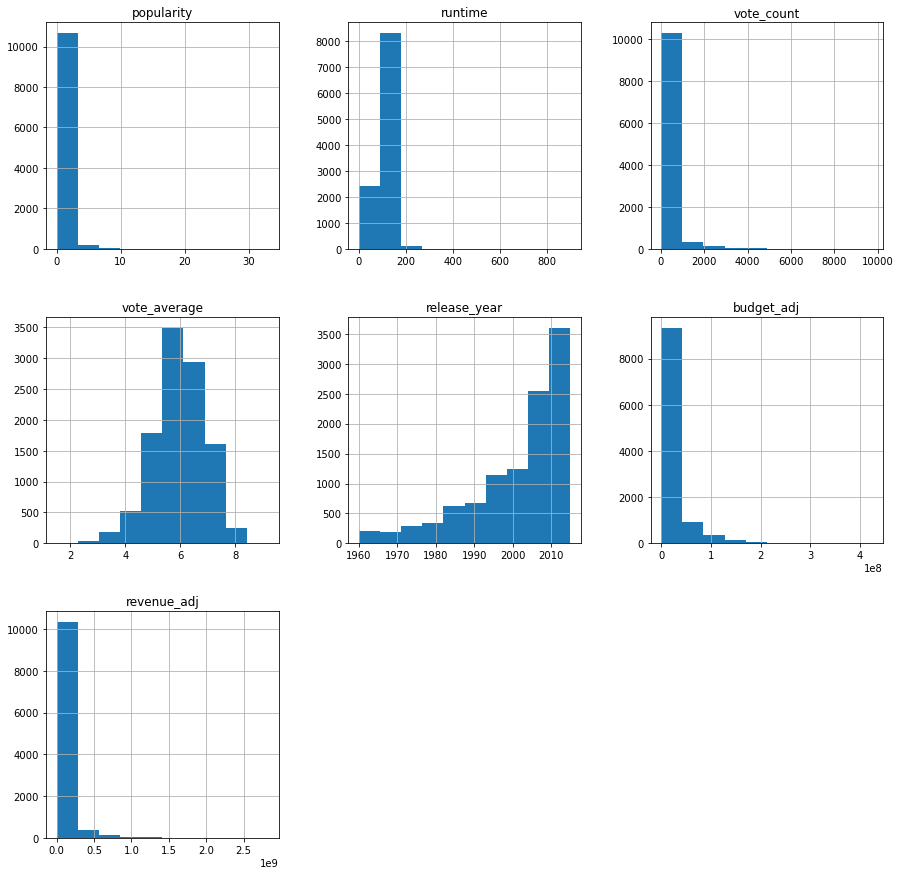

In [31]:
df.hist(figsize=(15, 15));

So now we have the df_rev dataframe ready for more exploration on the second question.

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 Which genres are most popular from year to year?

In order to answer this question, let us the df_pop dataframe to group by the mean for each genre in each year.

In [32]:
df_pop.head(10)

,genres,release_year,popularity
0,Action,2015,32.9858
0,Adventure,2015,32.9858
0,Science Fiction,2015,32.9858
0,Thriller,2015,32.9858
1,Action,2015,28.4199
1,Adventure,2015,28.4199
1,Science Fiction,2015,28.4199
1,Thriller,2015,28.4199
2,Adventure,2015,13.1125
2,Science Fiction,2015,13.1125


In [33]:
df_genre = df_pop.groupby(['release_year', 'genres'], as_index=False).mean()
df_genre.head(30)

,release_year,genres,popularity
0,1960,Action,0.5907
1,1960,Adventure,0.7010
2,1960,Comedy,0.3960
3,1960,Crime,0.3465
4,1960,Drama,0.5663
5,1960,Family,0.2781
6,1960,Fantasy,0.4282
7,1960,Foreign,0.1949
8,1960,History,0.4124
9,1960,Horror,0.5914


Now let us find out the maximum mean popularity in each year.

In [34]:
df_max = df_genre.groupby('release_year', as_index=False)['popularity'].max()

Now let us find out which genres were associated with those yearly maximum popularities. This will be done by merging the maximum dataframe with the grouped by dataframe using inner type join.

In [35]:
top_genre = df_max.merge(df_genre[['genres', 'popularity']], on='popularity')
top_genre

,release_year,popularity,genres
0,1960,0.8119,Thriller
1,1961,2.6320,Animation
2,1962,0.9425,Adventure
3,1963,2.1804,Animation
4,1964,0.9310,War
5,1965,0.9688,Music
6,1966,0.5857,Animation
7,1967,1.3488,Animation
8,1968,1.5195,Mystery
9,1969,0.9480,Crime


From the above dataframe, we can gather a couple of insights. For example, for the last 15 years of the analysis, only 3 genres (Fantasy, Western, Adventure) have been dominating the yearly top. Furthermore, it looks like Animation movies had two peaks, once around the 1960s and another around the beginning of the 1990s.

In order to further validate those yearly top genres, let us query the sorted genre popularities in random years and make sure it matches with our top_genre dataframe.

In [36]:
df_genre.query('release_year == 1973').sort_values('popularity', ascending=False)

,release_year,genres,popularity
229,1973,Animation,0.9565
234,1973,Family,0.8134
228,1973,Adventure,0.7309
243,1973,Thriller,0.6116
241,1973,Science Fiction,0.5645
227,1973,Action,0.5643
240,1973,Romance,0.5515
238,1973,Music,0.5492
236,1973,History,0.5253
233,1973,Drama,0.4759


In [37]:
df_genre.query('release_year == 1998').sort_values('popularity', ascending=False)

,release_year,genres,popularity
711,1998,War,1.2466
712,1998,Western,1.0576
695,1998,Animation,1.0118
703,1998,History,0.9300
694,1998,Adventure,0.8736
708,1998,Science Fiction,0.7818
693,1998,Action,0.7595
700,1998,Family,0.7522
701,1998,Fantasy,0.6910
706,1998,Mystery,0.6902


Another way to validate is by looking for duplicate values in years to make sure we only get the top genre in each year.

In [38]:
top_genre[top_genre['release_year'].duplicated(keep=False)]

,release_year,popularity,genres
11,1971,1.5307,Family
12,1971,1.5307,Fantasy


Oops! It looks like we have 2 top genres in 1971; both Family and Fanatasy are tied. Let us confirm this further by viewing the sorted genre popularities for this particular year.

In [39]:
df_genre.query('release_year == 1971').sort_values('popularity', ascending=False)

,release_year,genres,popularity
199,1971,Family,1.5307
200,1971,Fantasy,1.5307
206,1971,Science Fiction,1.2179
194,1971,Adventure,0.6469
195,1971,Animation,0.6308
193,1971,Action,0.6005
208,1971,Thriller,0.5044
197,1971,Crime,0.4564
198,1971,Drama,0.4031
196,1971,Comedy,0.3974


It looks like there is no mistake. It just so happens that both genres are tied for this year.

Moreover, in order to visualize the trend analysis of top genres, it is better to select only a few of them instead of looking at so many distinct genres. In the below section, I will select only the few top worthy genres based on the overall mean popularity.

In [40]:
df_genre.sort_values('popularity', ascending=False).head(10)['genres'].unique()

array(['Adventure', 'Western', 'Animation', 'Science Fiction', 'Action',
       'Fantasy'], dtype=object)

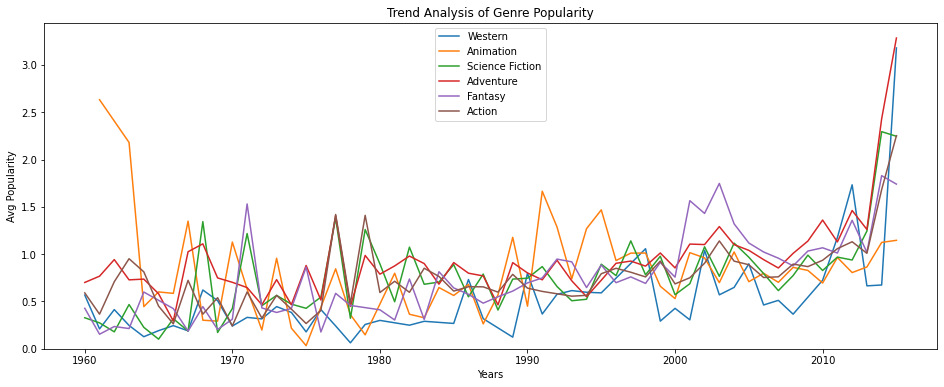

In [41]:
top = ['Western', 'Animation', 'Science Fiction', 'Adventure', 'Fantasy', 'Action']
plt.figure(figsize=(16, 6))
for i in top:
    x = df_genre.query('genres == @i')
    plt.plot(x['release_year'], x['popularity'], label=i)
plt.legend()
plt.ylim(ymin=0)
plt.title('Trend Analysis of Genre Popularity')
plt.xlabel('Years')
plt.ylabel('Avg Popularity');

It looks like the trend analysis graph is hard to read due to intense fluctuations from one year to another. So let us use the below method to depict the moving average mean popularity instead. The method to calcuating the smoothing average is refrenced from https://www.absentdata.com/pandas/python-moving-average/.

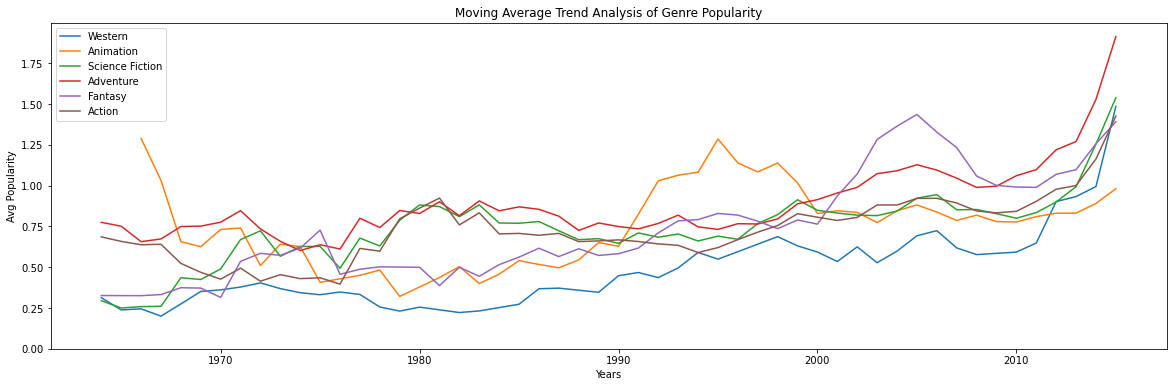

In [42]:
def genre_trend_chart():
    plt.figure(figsize=(20, 6))
    for i in top:
        x = df_genre.query('genres == @i')
        plt.plot(x['release_year'], x['popularity'].rolling(window=5).mean(), label=i)
    plt.legend()
    plt.ylim(ymin=0)
    plt.title('Moving Average Trend Analysis of Genre Popularity')
    plt.xlabel('Years')
    plt.ylabel('Avg Popularity')
genre_trend_chart()

This is looking much better for a trend analysis for the top 6 genres. 

For instance, it is clear that Western movie genre has gained popularity on two phases, the first being in the mid 90s which is a mild increase as opposed to the noticeable increase after 2010. Additionally, as mentioned before, Animation type movies had 2 peaks, once around the 60s and another in the 90s. Another thing to notice is that Fantasy movies gained a lot of popularity after the year 2000. For the most part, Action, SciFi, and Adventure movies had a somehow similar and relatively consistent above average popularity across the years. Except that Adventure movie genre gained dramatic popularity starting 2010 which keeps increasing. Finally there is an upward going trend for all 6 movie genres in the last 5 year of the analysis.



### Research Question 2  What kinds of properties are associated with movies that have high revenues?

In order to have a look at what possible correlations in the dataset could be. let us depict a scatter matrix using the df_rev dataframe prepared in the wrangling phase to gain an overview. 

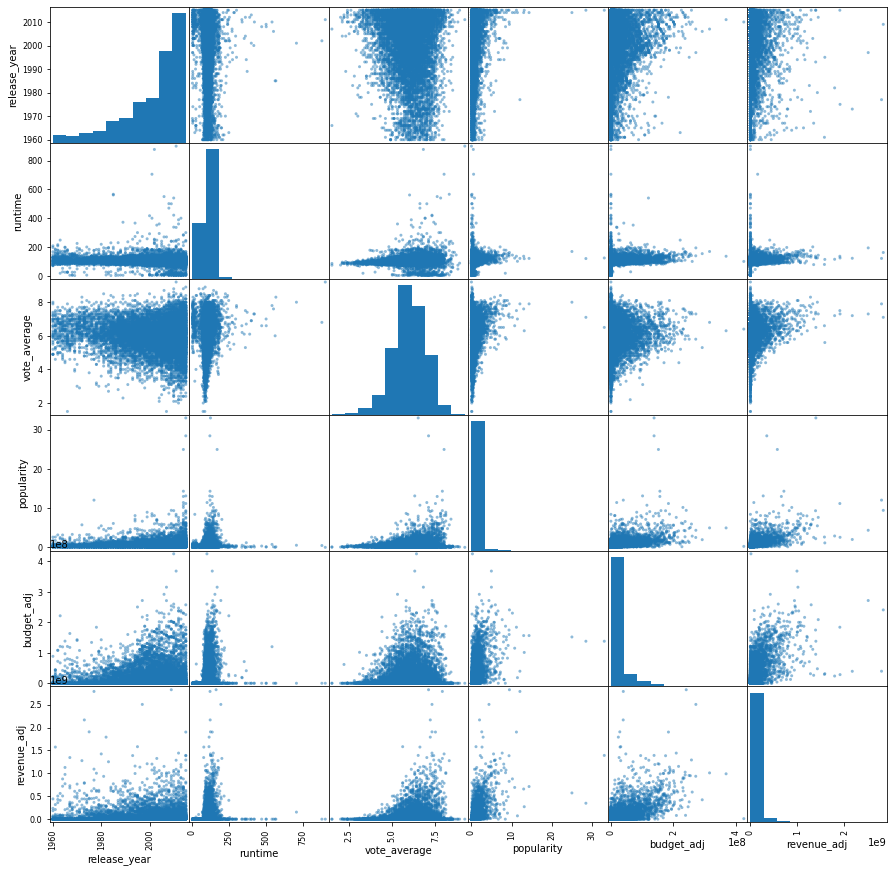

In [43]:
pd.plotting.scatter_matrix(df_rev, figsize=(15, 15));

Let us also have a look at the correlations between adjusted revenues and other variables.

In [44]:
df_rev.corr()['revenue_adj']

release_year   -0.0662
runtime         0.1750
vote_average    0.1931
popularity      0.6091
budget_adj      0.6466
revenue_adj     1.0000
Name: revenue_adj, dtype: float64

From the above data, I can see that popularity and adjusted budget have a medium high positive correlation with adjusted revenues which shows a clear assossiation. Additionally, even though vote average seems to have a low correlation with revenues, I still believe it could pursued further as the scatter diagram shows a possible relations whcih might be suppressed due to the extreme rigth skeweness of revenues.

For each of the 3 possible correlations, I will query the dataframe twice to separate those below the median from the above ones. Then I will calculate the mean for the queried parts and visualize them using a bar chart. This will help show the mean difference in adjusted revenues in terms of high vs low of the variable under investigation. 

>**1- Adjusted Budget**

In [45]:
high_budg = df_rev.query('budget_adj > budget_adj.median()')['revenue_adj'].mean()
low_budg = df_rev.query('budget_adj <= budget_adj.median()')['revenue_adj'].mean()
high_budg - low_budg

96950023.27053736

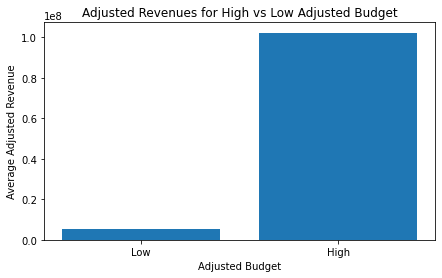

In [46]:
plt.figure(figsize=(7, 4))
heights = [low_budg, high_budg]
plt.bar(['Low', 'High'], heights)
plt.title('Adjusted Revenues for High vs Low Adjusted Budget')
plt.xlabel('Adjusted Budget')
plt.ylabel('Average Adjusted Revenue');

With a mean difference of approximately 97 million, it is clear from the above bar chart that above median budget_adj movies are associated with a higher mean adjusted revenue as asserted through the correlations calculated before.

>**2- Popularity**

In [47]:
high_pop = df_rev.query('popularity > popularity.median()')['revenue_adj'].mean()
low_pop = df_rev.query('popularity <= popularity.median()')['revenue_adj'].mean()
high_pop - low_pop

89325123.58014806

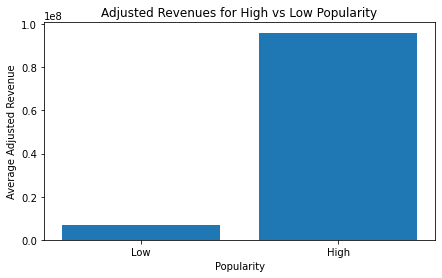

In [48]:
plt.figure(figsize=(7, 4))
heights = [low_pop, high_pop]
plt.bar(['Low', 'High'], heights)
plt.title('Adjusted Revenues for High vs Low Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Adjusted Revenue');

With a mean difference of almost 90 million, it is clear from the above bar chart that above median popularity movies are associated with a higher mean adjusted revenue as asserted through the correlations calculated before.

>**3- Vote Average**

In [49]:
high_votes = df_rev.query('vote_average > vote_average.median()')['revenue_adj'].mean()
low_votes = df_rev.query('vote_average <= vote_average.median()')['revenue_adj'].mean()
high_votes - low_votes

47039402.94476725

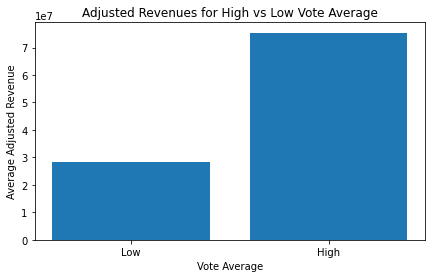

In [50]:
plt.figure(figsize=(7, 4))
heights = [low_votes, high_votes]
plt.bar(['Low', 'High'], heights)
plt.title('Adjusted Revenues for High vs Low Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Average Adjusted Revenue');

With a mean difference of 47 million, it is clear from the above bar chart that above median vote avergae movies are associated with a higher mean adjusted revenue as opposed to what the calculated correlations showed before.

<a id='conclusions'></a>
## Conclusions

### A- Summary of Findings

##### Research Question 1 Which genres are most popular from year to year?

In [51]:
top_genre.set_index('release_year')

,popularity,genres
release_year,,
1960,0.8119,Thriller
1961,2.6320,Animation
1962,0.9425,Adventure
1963,2.1804,Animation
1964,0.9310,War
1965,0.9688,Music
1966,0.5857,Animation
1967,1.3488,Animation
1968,1.5195,Mystery


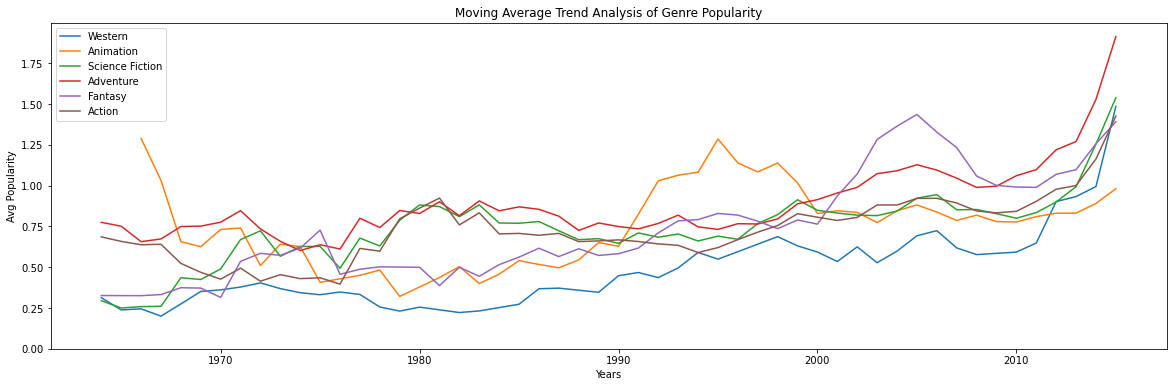

In [52]:
genre_trend_chart()

**1-** For the last 15 years of the analysis (2000-2015), only 3 genres (Fantasy, Western, Adventure) have been dominating the yearly top.

**2-** Fantasy movies gained a lot of popularity after the year 2000.

**3-** Animation movies had 2 popularity peaks, once around the 1960s and another around the beginning of the 1990s.

**4-** Western movie genre has gained popularity on 2 phases, the first being in the mid 90s which is a mild increase as opposed to the noticeable increase after 2010.

**5-** For the most part, Action, SciFi, and Adventure movies had a somehow similar and relatively consistent above average popularity across the years. Except that Adventure movie genre gained dramatic popularity starting 2010 which keeps increasing.

**6-** It looks like we have 2 top genres in 1971; both Family and Fanatasy are tied with maximum mean popularities.

**7-** Finally there is an upward going trend for all 6 movie genres in the last 5 year of the analysis.

##### Research Question 2  What kinds of properties are associated with movies that have high revenues?

**1-** With a mean difference of approximately 97 million, it seems that high budget movies are generally associated with higher revenues. This is true with positive medium high correlation of +0.65.

**2-** With a mean difference of almost 90 million, it seems that movies with high populariyt are generally associated with higher revenues. This is true with positive medium high correlation of +0.61.

**3-** Even though the correlation between votes and revenues is on the strong side with a coefficient of +0.19, it looks like movies with high vote average are generally associated with higher revenues with a mean difference of 47 million.

### B- Limitations

There are two main limititations to be noted. 

**1-** Due to how several variables are agressively right skeweded and it is not clear if those are outliers. The final conclusions might have been deviated. Additionally, over 7000 rows have unjustified zeros which could indicate null values. This too can harm the final conclusions and lead to inaccurate results.

**2-** It is important to understand that any conclusions made are tentative as they are based on subjective analysis of whether how how trend data are viewed or high vs low clustering of variables. Nonetheless, some correlation coefficients are calculated to indicate associations. This, however, does not imply causality between the investigated variables.

<a id='references'></a>
## References

All references used throughout the project are listed below.

https://stackoverflow.com/questions/42735541/customized-float-formatting-in-a-pandas-dataframe/47614756

https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

https://www.absentdata.com/pandas/python-moving-average/